/tmp/ipython-input-2088856846.py:24: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(FILE_NAME)


Dataset 'covidvaccine.csv' loaded successfully!
Total records: 399645

First 5 rows of the dataset:
                 user_name              user_location  \
0                 MyNewsNE                      Assam   
1            Shubham Gupta                        NaN   
2  Journal of Infectiology                        NaN   
3                     Zane                        NaN   
4       Ann-Maree O’Connor  Adelaide, South Australia   

                                    user_description      user_created  \
0  MyNewsNE a dedicated multi-lingual media house...  24-05-2020 10:18   
1  I will tell about all experiences of my life f...  14-08-2020 16:42   
2  Journal of Infectiology (ISSN 2689-9981) is ac...  14-12-2017 07:07   
3                                  Fresher than you.  18-09-2019 11:01   
4  Retired university administrator. Melburnian b...  24-01-2013 14:53   

   user_followers user_friends user_favourites user_verified  \
0            64.0         11.0           110.0  

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Classifying: 100%|██████████| 500/500 [17:53<00:00,  2.15s/it]


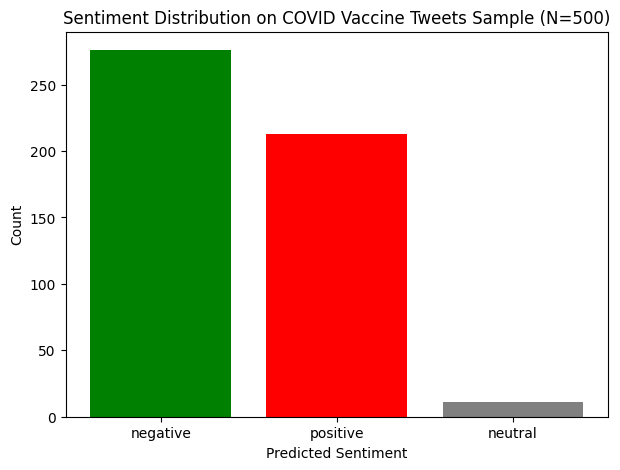


First 10 Classified Samples:
                                                text  \
0  Australia to Manufacture Covid-19 Vaccine and ...   
1  #CoronavirusVaccine #CoronaVaccine #CovidVacci...   
2  Deaths due to COVID-19 in Affected Countries\n...   
3  @Team_Subhashree @subhashreesotwe @iamrajchoco...   
4  @michellegrattan @ConversationEDU This is what...   
5  The Multi-system Inflammatory Syndrome-Childre...   
6  @PrivilRodrigues @yatish57 @deepkaranahuja @sh...   
7  @MSNBC Well, let’s qualify that: would anyone ...   
8  Most countries, without the ability to make #V...   
9  #DNA  zooms up charts in 1st week; hear #vacci...   

                                          clean_text predicted_sentiment  
0  Australia to Manufacture Covid-19 Vaccine and ...            positive  
1                       Australia is doing very good            positive  
2  Deaths due to COVID-19 in Affected Countries\n...            negative  
3                      Stay safe  di &amp;  da ❤️❤️… 

In [ ]:
# Mini Project: Large Language Models are Zero-Shot Classifiers
# Dataset: COVID Vaccine Tweets (Kaggle)
# Flowchart used: LLMs Flow (Data Collection -> LLMs -> Classification Results)

# Install necessary libraries
!pip install transformers torch pandas matplotlib tqdm --quiet

import pandas as pd
import re
from tqdm import tqdm
from transformers import pipeline
import matplotlib.pyplot as plt

# ---

# # Step 1: Data Collection (Load Dataset)
# NOTE: You must upload the correct CSV file (e.g., 'vaccination_tweets.csv')
# from the Kaggle dataset linked to your working environment.
FILE_NAME = "covidvaccine.csv" # Changed to the new file name
TEXT_COLUMN = "text"

data = None  # Initialize data to None
try:
    data = pd.read_csv(FILE_NAME)
    print(f"Dataset '{FILE_NAME}' loaded successfully!")
    print(f"Total records: {len(data)}")
    print("\nFirst 5 rows of the dataset:")
    print(data.head())
except FileNotFoundError:
    print(f"Error: '{FILE_NAME}' not found. Please ensure the file is in the correct directory.")

# ---

# Only proceed if the data was loaded successfully
if data is not None:
    # # Step 2: Minimal Preprocessing
    # LLMs are robust, so we only perform essential cleaning (like removing URLs).
    def clean_tweet_llm(text):
        """
        Cleans the tweet text by only removing URLs.
        """
        # Remove URLs (http/https and www)
        text = re.sub(r"http\S+|www\S+", '', str(text))
        # Optionally remove mentions and hashtags if desired, but often kept for context
        text = re.sub(r'[@#]\w+', '', text)
        return text.strip()

    # Apply cleaning function to the original text column
    data['clean_text'] = data[TEXT_COLUMN].apply(clean_tweet_llm)

    # Drop rows where 'clean_text' is missing or becomes empty after cleaning
    data = data.dropna(subset=['clean_text'])

    # Take a small sample for demonstration, as running the model on the full dataset is slow
    SAMPLE_SIZE = 500
    sample_data = data.head(SAMPLE_SIZE).copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nProcessing a sample of {len(sample_data)} tweets...")

    # ---

    # # Step 3: LLMs (Zero-Shot Classification)
    # This step uses the BART-large model to classify the text without training.
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    candidate_labels = ["positive", "negative", "neutral"]

    predicted_labels = []
    # Use tqdm for a progress bar during the slow classification step
    for text in tqdm(sample_data['clean_text'], desc='Classifying'):
        # Classifier returns scores for all candidate labels
        result = classifier(text, candidate_labels, multi_label=False)
        # Append the label with the highest score (which is the first one in the list)
        predicted_labels.append(result['labels'][0])

    # Add the predicted sentiments back to the sample_data DataFrame
    sample_data['predicted_sentiment'] = predicted_labels

    # ---

    # # Step 4: Classification Results (Visualization & Display)

    # Visualization
    sentiment_counts = sample_data['predicted_sentiment'].value_counts()

    plt.figure(figsize=(7,5))
    plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
    plt.title(f"Sentiment Distribution on COVID Vaccine Tweets Sample (N={len(sample_data)})")
    plt.xlabel("Predicted Sentiment")
    plt.ylabel("Count")
    plt.show()

    # Display Results
    print("\nFirst 10 Classified Samples:")
    print(sample_data[[TEXT_COLUMN, 'clean_text', 'predicted_sentiment']].head(10))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covidvaccine.csv to covidvaccine.csv


/tmp/ipython-input-2059404779.py:14: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covidvaccine.csv")


Dataset loaded successfully! Total records: 399645


Device set to use cpu
Classifying: 100%|██████████| 100/100 [04:07<00:00,  2.48s/it]


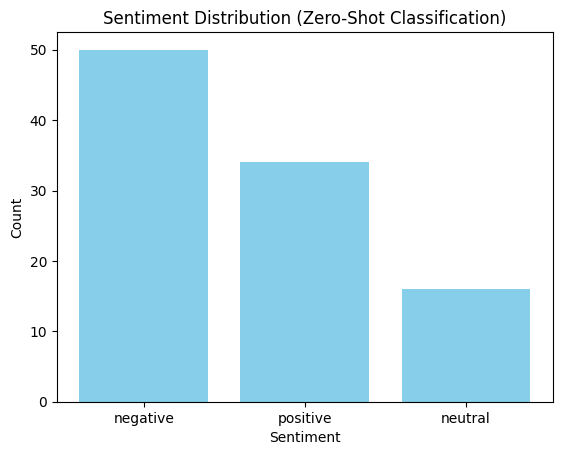


First 10 Classified Samples:
                                          clean_text predicted_sentiment
0  Australia to Manufacture Covid-19 Vaccine and ...            positive
1                       Australia is doing very good            positive
2  Deaths due to COVID-19 in Affected Countries\n...            negative
3                      Stay safe  di &amp;  da ❤️❤️…            positive
4  This is what passes for leadership in our coun...            negative
5  The Multi-system Inflammatory Syndrome-Childre...            negative
6                                                  …             neutral
7  Well, let’s qualify that: would anyone of any ...             neutral
8  Most countries, without the ability to make  l...            negative
9  zooms up charts in 1st week; hear  episode:  ....            positive

⚠️ No ground truth labels found — accuracy report skipped.


In [ ]:
# Mini Project: Large Language Models are Zero-Shot Classifiers
# Flow: Data Collection → LLMs → Classification Results
# Dataset: COVID-19 Tweets (Kaggle)

!pip install transformers torch pandas matplotlib tqdm scikit-learn --quiet

import pandas as pd, re, matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import pipeline
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load Dataset
try:
    df = pd.read_csv("covidvaccine.csv")
    print(f"Dataset loaded successfully! Total records: {len(df)}")
except FileNotFoundError:
    raise SystemExit("Error: 'covidvaccine.csv' not found.")

# Step 2: Clean Text (Light preprocessing for better LLM accuracy)
df['clean_text'] = df['text'].astype(str).apply(lambda x: re.sub(r"http\S+|www\S+|@\w+|#\w+", '', x).strip())
df = df[df['clean_text'].str.len() > 0].head(100)

# Step 3: Zero-Shot Classification using LLM (BART)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
labels = ["positive", "negative", "neutral"]

def classify(text):
    r = classifier(text, labels)
    return r['labels'][0] if r['scores'][0] > 0.5 else "neutral"

tqdm.pandas(desc="Classifying")
df['predicted_sentiment'] = df['clean_text'].progress_apply(classify)

# Step 4: Results Visualization
counts = df['predicted_sentiment'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue')
plt.title("Sentiment Distribution (Zero-Shot Classification)")
plt.xlabel("Sentiment"); plt.ylabel("Count")
plt.show()

print("\nFirst 10 Classified Samples:")
print(df[['clean_text', 'predicted_sentiment']].head(10))

# Step 5: Accuracy & Classification Report (if ground truth exists)
if 'label' in df.columns:
    y_true = df['label'].astype(str).str.lower()
    y_pred = df['predicted_sentiment'].astype(str).str.lower()
    print("\nModel Evaluation:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred) * 100, 2), "%")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=3))
else:
    print("\n⚠️ No ground truth labels found — accuracy report skipped.")
